# Sprawozdanie

## Temat projektu: Określanie pozycji na której powinien grać piłkarz na podstawie jego cech

#### Zespół 4: Krzysztof Maciejewski, Marcin Kotecki, Seweryn Bieńko

Źródło danych: https://www.kaggle.com/karangadiya/fifa19

## Wstęp

Seria FIFA jest najpopularniejszą serią gier o piłce nożnej. Gra FIFA19, wydana w 2018 roku przez EA Vancouver, jest 26 częścią tej serii. Dane z tej gry, zawierające cechy każdego piłkarza, zostały udostępnione na stronie Kaggle. Na ich podstawie będziemy chcieli utworzyć model, który określi pozycję na jakiej powinien grać piłkarz biorąc pod uwagę jego cechy.

## Import niezbędnych bibliotek

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import tree
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB

## Wczytanie danych

In [3]:
# Wczytanie i transformacja danych
df = pd.read_csv('data.csv', index_col = 0)
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## Wstępna obróbka danych
Lista atrybutów:

In [4]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

Wiele atrybutów możemy od razu odrzucić, ponieważ nie pasują do naszego modelu (nie mają wpływu na pozycję na jakiej gra piłkarz). Te atrybuty to:
- ID, 
- Name,
- Age,
- Photo, 
- Nationality, 
- Flag,
- Overall,
- Potential, 
- Club, 
- Club Logo, 
- Value, 
- Wage, 
- Special, 
- International Reputation, 
- Work Rate,
- Body Type - atrybut ten jest używany do określenia modelu zawodnika w grze, dysponujemy bardziej szczegółowymi atrybutami fizycznymi;
- Real Face, 
- Jersey Number, 
- Joined, 
- Loaned From, 
- Contract Valid Until, 
- 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 
- Release Clause.

In [5]:
# Pozbycie się zbędnych kolumn
df = df.drop(columns=['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential', 'Club', 'Club Logo'])
df = df.drop(columns=['Value', 'Wage', 'Special', 'International Reputation', 'Work Rate', 'Body Type', 'Real Face'])
df = df.drop(columns=['Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'LS', 'ST', 'RS', 'LW'])
df = df.drop(columns=['LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM'])
df = df.drop(columns=['CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Release Clause'])

Sprawdzamy braki w danych:

In [6]:
df.isnull().sum() # liczba wartości NaN dla każdej kolumny

Preferred Foot     48
Weak Foot          48
Skill Moves        48
Position           60
Height             48
Weight             48
Crossing           48
Finishing          48
HeadingAccuracy    48
ShortPassing       48
Volleys            48
Dribbling          48
Curve              48
FKAccuracy         48
LongPassing        48
BallControl        48
Acceleration       48
SprintSpeed        48
Agility            48
Reactions          48
Balance            48
ShotPower          48
Jumping            48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
Composure          48
Marking            48
StandingTackle     48
SlidingTackle      48
GKDiving           48
GKHandling         48
GKKicking          48
GKPositioning      48
GKReflexes         48
dtype: int64

Wygląda na to, że 48 rekordów nie zawiera danych. Jest to zaledwie 0.3% naszego zbioru, więc usuwamy te rekordy.

In [7]:
df.dropna(inplace = True)

#### Opis atrybutów numerycznych:

In [8]:
df.describe().T # opis danych numerycznych

,count,mean,std,min,25%,50%,75%,max
Weak Foot,18147.0,2.947154,0.660498,1.0,3.0,3.0,3.0,5.0
Skill Moves,18147.0,2.361492,0.756274,1.0,2.0,2.0,3.0,5.0
Crossing,18147.0,49.738414,18.364255,5.0,38.0,54.0,64.0,93.0
Finishing,18147.0,45.550229,19.527445,2.0,30.0,49.0,62.0,95.0
HeadingAccuracy,18147.0,52.300766,17.381753,4.0,44.0,56.0,64.0,94.0
ShortPassing,18147.0,58.695432,14.696075,7.0,54.0,62.0,68.0,93.0
Volleys,18147.0,42.912217,17.695900,4.0,30.0,44.0,57.0,90.0
Dribbling,18147.0,55.375158,18.912224,4.0,49.0,61.0,68.0,97.0
Curve,18147.0,47.176283,18.396009,6.0,34.0,48.0,62.0,94.0
FKAccuracy,18147.0,42.866038,17.480034,3.0,31.0,41.0,57.0,94.0


Niemal wszystkie brane przez nas atrybuty są znormalizowane 0-100, co pomoże nam przy analizie i tworzeniu modelu.

Atrybuty Weak Foot oraz Skill Moves, które są podane w skali 1-5, znormalizujemy 0-100, aby dopasować je do reszty.

In [9]:
norm_list = ["Weak Foot", "Skill Moves"]

for n in norm_list:
    df[n] = 100 * df[n]/df[n].max() #normalizacja 0-100

df[norm_list].head()

,Weak Foot,Skill Moves
0,80.0,80.0
1,80.0,100.0
2,100.0,100.0
3,60.0,20.0
4,100.0,80.0


#### Opis atrybutów kategorycznych:

In [10]:
df.drop(columns = ["Position"]).describe(include=['object']).T

,count,unique,top,freq
Preferred Foot,18147,2,Right,13938
Height,18147,21,6'0,2880
Weight,18147,57,165lbs,1483


Mamy tylko 3 atrybuty kategoryczne. Możemy je jednak łatwo przekonwertować: Height i Weight na numeryczne i Preferred Foot na binarny.

Atrybut Height możemy zamienić na numeryczny zmieniając jednostki na cale. Dodatkowo znormalizujemy go, aby jego wartości były wyskalowane tak samo jak atrybuty umiejętności, co ułatwi dalszą analizę danych.

In [11]:
def ft_to_inch(ft): # funkcja do zamiany jednostki [stopy+cale] na [cale]
    x = [int(i) for i in ft.split("'")] 
    x[1] += x[0] * 12
    return x[1]

df["Height"] = df["Height"].map(lambda x: ft_to_inch(x))
df["Height"] = round(100*df["Height"]/df["Height"].max(), 0) # normalizacja 0-100
df["Height"].describe()

count    18147.000000
mean        88.061332
std          3.317462
min         75.000000
25%         85.000000
50%         88.000000
75%         90.000000
max        100.000000
Name: Height, dtype: float64



Podobnie możemy uczynić atrybut Weight numerycznym, usuwając przyrostek lbs z każdego rekordu. Również normalizujemy ten atrybut 0-100.

In [12]:
df["Weight"] = df["Weight"].map(lambda x:  int(round(int(x[:-3]), 0)))
df["Weight"] = round(100*df["Weight"]/df["Weight"].max(), 0)
df["Weight"].describe()

count    18147.000000
mean        68.257012
std          6.418491
min         45.000000
25%         63.000000
50%         68.000000
75%         72.000000
max        100.000000
Name: Weight, dtype: float64

Na koniec, atrybut Preferred Foot możemy uczynić atrybutem binarnym. Piłkarzom lewonożnym przypiszemy wartość 1, a prawonożnym 0, zaś sam atrybut nazwiemy isLeft.

In [13]:
df['isLeft'] = df["Preferred Foot"].map(lambda x: 0 if x == "Right" else 1)
df.drop(columns=["Preferred Foot"], inplace = True)
df['isLeft'].describe()

count    18147.000000
mean         0.231939
std          0.422082
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: isLeft, dtype: float64

## Eksploracyjna Analiza Danych
Sprawdzamy ile unikalnych wartość ma nasz atrybut decyzyjny:

In [14]:
len(df.Position.unique())

27

Nasz atrybut decyzyjny ma wiele unikalnych wartości. Możliwe, że dla poszczególne pozycje mają bardzo mało reprezentantów i będziemy mogli je zignorować. Sprawdzamy zatem ile jest piłakrzy na poszczególnych pozycjach.

In [15]:
df.groupby("Position")["Position"].count().sort_values(ascending = False)

Position
ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
RAM      21
LAM      21
RF       16
LF       15
Name: Position, dtype: int64

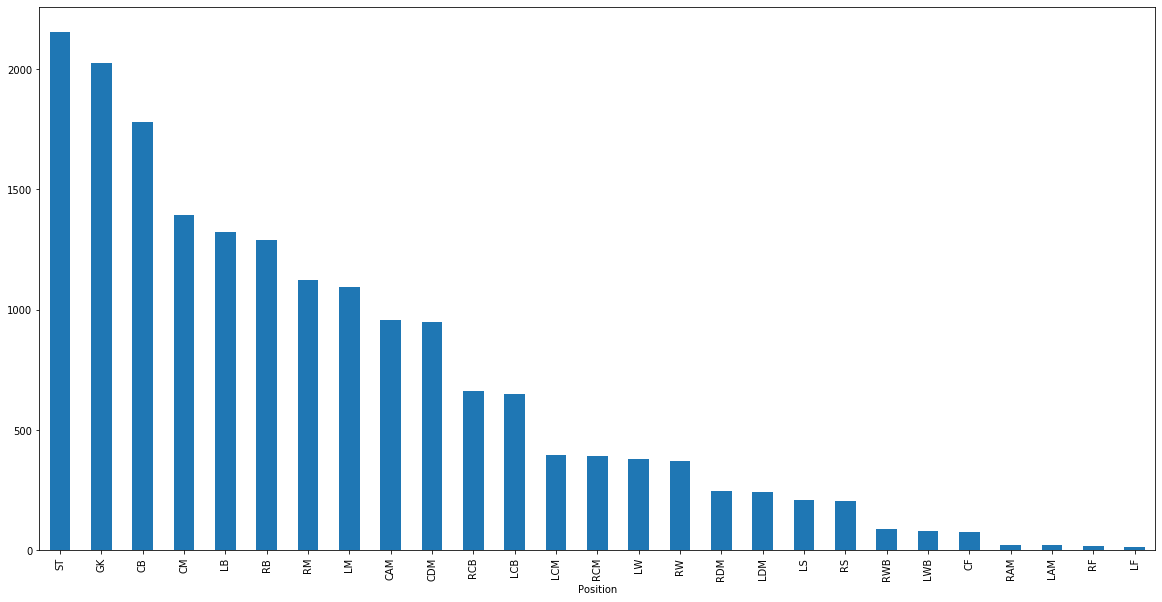

In [16]:
df.groupby("Position")["Position"].count().sort_values(ascending = False).plot(kind = 'bar', figsize=(20,10))

Widzimy, że pozycje RAM, LAM, RF i LF mają bardzo mało przedstawicieli - łącznie jest ich tylko 73 dla ponad 18000 rekordów w całym zbiorze. Nie warto uwzględniać w modelu tak nielicznych zbiorów, ponieważ są mało reprezentatywne i mogą negatywnie wpłynąć na dokładność modelu. Z tego względu wyrzucimy te pozycje z danych.

In [17]:
df = df[(df.Position != 'RAM') & (df.Position != 'LAM') & (df.Position != 'RF') & (df.Position != 'LF')]

Pozostałe pozycje możemy pogrupować, aby ułatwić sobię dalszą analizę. Naturlany wydaje się być podział na napastników, pomocników, obrońców i bramkarzy.

In [18]:
defe = ['RWB', 'RCB', 'RB', 'LWB', 'LCB', 'LB', 'CB'] # obrońcy
fwd = ['ST', 'RW', 'RS', 'LW', 'LS', 'CF'] # napastnicy
mid = ['RM', 'RDM', 'RCM', 'LDM', 'LCM', 'CM', 'CDM', 'CAM', 'LM'] # pomocnicy
gk = ['GK'] # bramkarz
all_pos = fwd + mid + defe + gk # wszystkie pozycje

### Atrybuty kategoryczne

Analizę zaczniemy od jedynego nienumerycznego atrybutu, czyli isLeft (stworzonego z Preferred Foot). Najpierw przedstawimy wykres pokazujący jaki procent piłkarzy na danej pozycji jest lewonożny.

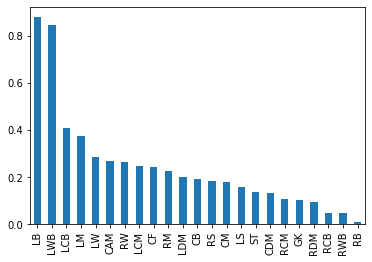

In [19]:
# wykres dla preferowanej nogi
dict1 = {}
for p in all_pos:
    dict1[p] = df[df.Position == p].groupby('isLeft')['isLeft'].count()[1] / df[df.Position == p].count()["isLeft"]

lfoot = pd.DataFrame.from_dict(dict1, orient='index').sort_values(by = 0, ascending = False)
lfoot.plot.bar(legend = False)

Z wykresu widać, że gracze grający z lewej strony są częściej lewonożni, niż ci grający z prawej (zwłacza jest to widoczne dla obrońców). Aby lepiej pokazać tę zależność, możemy stworzyć analogiczny wykres, gdzie piłkarzy podzielimy na grających na prawej stronie (R) i na lewej (L).

([<matplotlib.axis.XTick at 0x26293c2b808>,
 <a list of 2 Text xticklabel objects>)

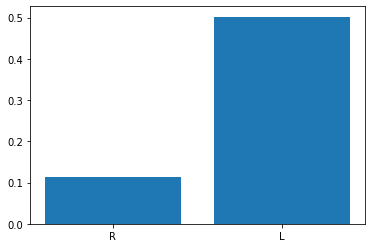

In [20]:
rl = {}
rl['R'] = df[df.Position.str.startswith('R')].groupby('isLeft')['isLeft'].count()[1] / df[df.Position.str.startswith('R')].count()["Position"]
rl['L'] = df[df.Position.str.startswith('L')].groupby('isLeft')['isLeft'].count()[1] / df[df.Position.str.startswith('L')].count()["Position"]
plt.bar(range(len(rl)), list(rl.values()), align='center')
plt.xticks(range(len(rl)), list(rl.keys()))

Z powyższego wykresu wynika, że połowa piłkarzy grających na lewej stronie jest lewonożna, kiedy na prawej stronie gra takich piłkarzy ledwie 10%. Atrybut "isLeft" przyda się zatem w naszym modelu, do rozróżniania po której stronie gra piłkarz.

Atrybut binarny "isLeft" będziemy przechwywać osobno, aby nie przeszkadzał w analizie atrybutów numerycznych.

In [21]:
isLeft = df["isLeft"]
df.drop(columns = ["isLeft"], inplace = True)

### Atrybuty numeryczne

Z uwagi na dużą ilość numerycznych atrybutów opisowych oraz wiele unikalnych wartości atrybutu decyzyjnego, mamy ograniczone możliwości tworzenia czytelnych wykresów. W wizualizacji dla zadaniań klasyfikacji świetnie sprawdza się seaborn.pairplot z podziałem na poszczególne grupy (atrybut hue). Tutaj jednak mamy 23 pozycje do rozróżnienia i taki wykres byłby zupełnie nieczytelny. Z tego względu przedstawimy dane w postaci mapy ciepła, gdzie wartościami będą średnie wartości danego atrybutu dla piłkarzy na danej pozycji.

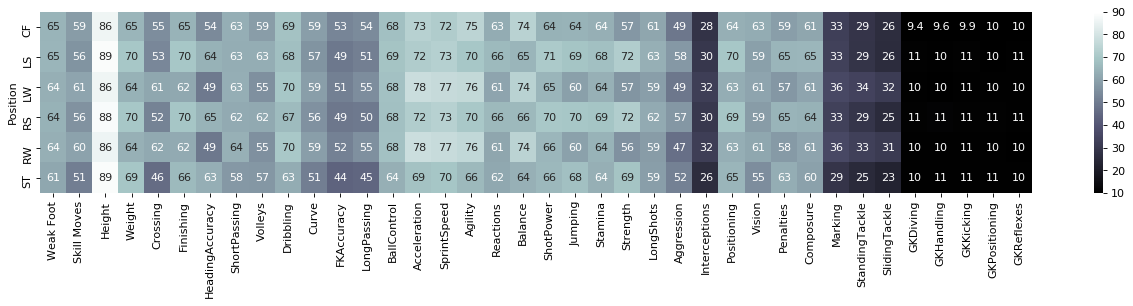

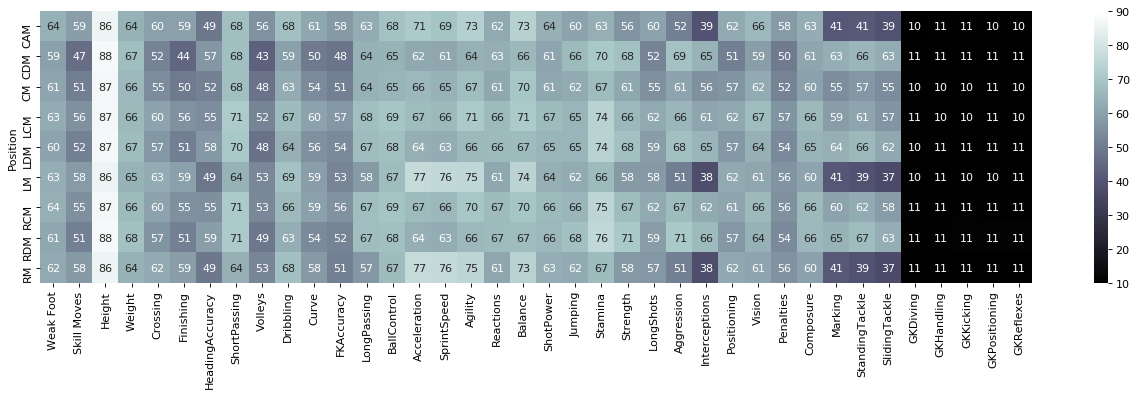

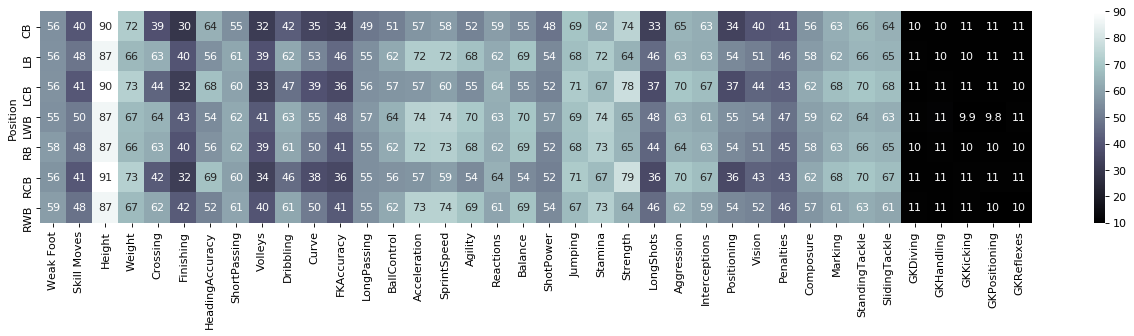

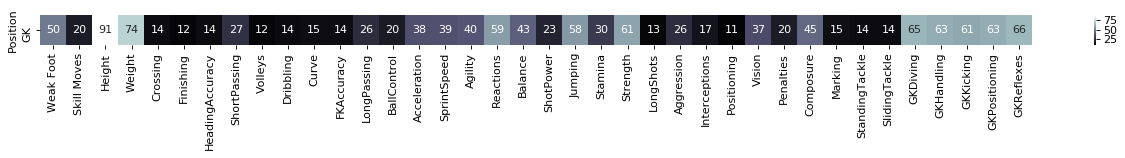

In [22]:
for p in [fwd, mid, defe, gk]: 
    dff = df.loc[df['Position'].isin(p)].groupby('Position', as_index=True).mean()
    plt.figure(figsize=(20,len(p)/2),dpi = 80)
    sns.heatmap(dff, cmap="bone", annot=True, vmin = 10, vmax = 90)

Z powyżeszego wykresu możemy odczytać wiele ciekawych zależności. Na pierwszy rzut oka wyraźnie widać jak mocno skorelowane są atrybuty bramkarskie i jak jednoznacznie są w stanie odróźnić bramkarza od innych. 

Mamy również pokaźną grupę atrybutów, które odróżniają **piłkarzy ofensywnych od defensywnych**. Są to m.in:
- Skill Moves (wyższe dla ofensywnych)
- Finishing (wyższe dla ofensywnych)
- Volleys (wyższe dla ofensywnych)
- Agression (wyższa dla defensywnych
- Interceptions (wyższe dla defensywnych)
 
Mamy również parę atrybutów, które moocniej wyróźniają **obrońców od pomocników i napastników**, np:
- Weak Foot
- LongShots
- Composure

Z naszych danych możemy również wyraźnie wyróżnić **graczy grającyh po bokach od tych grających na środku**. Gracze grający na skrzydłach są zwykle szybsi i zwinniejsi. Są to atrybuty:
- Crossing
- Dribbling
- Acceleration
- SprintSpeed

Szczególnie różnice pomiędzy środkowymi, a bocznymi graczami widać wśród obrońców. Środkowi obrońcy słyną np: z dobrej gry głową, zaś boczni obrońcy z szybkości i dobrych dośrodkowań. Różnice te obrazują atrybuty:
- HeadingAccuracy
- Curve (także LF i RF)
- Balance
- Positioning

W danych nie widać natomiast atrybutu, który wyraźnie rodzielał by pomocników od reszty. Wiele ich atrybutów jest zbliżone wartościami do napastników. Najlepsze wydają się być atrybuty LongPassing oraz Finishing.

## Scalanie skorelowanych atrybutów

Z racji, że wiele atrybutów wskazuje na te same zależności, prawdopodnie wiele z nich jest również mocno skorelowanych. Możemy połaczyć najbardziej skorelowane atrybuty ze sobą, aby uprościć sobie model.

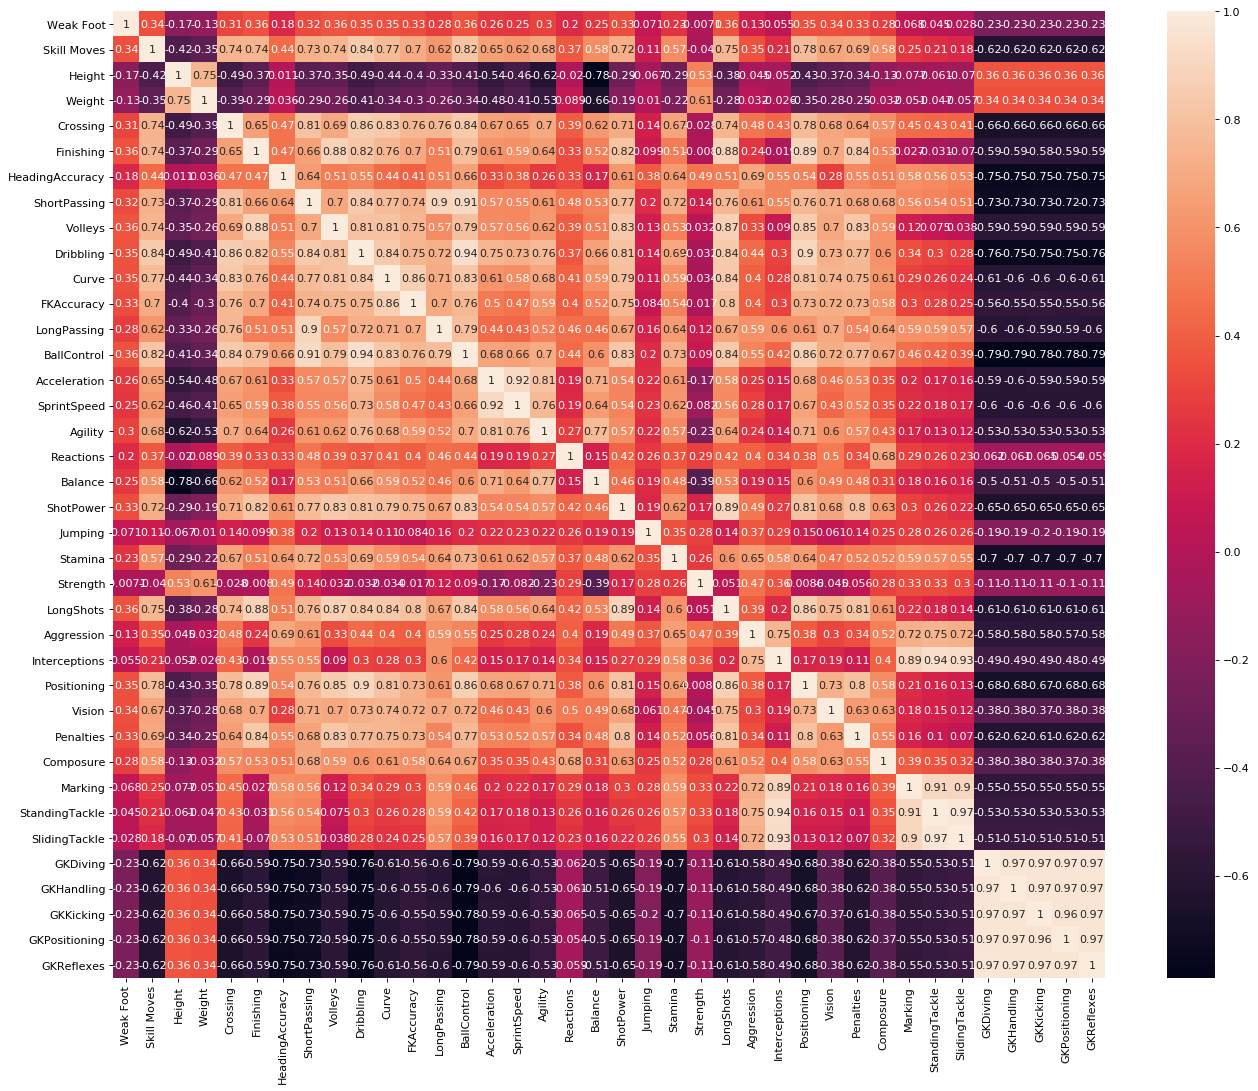

In [23]:
plt.figure(figsize=(20,16),dpi = 80)
sns.heatmap(df.corr(),annot = df.corr()) #mapa ciepła z korelacją

Z mapy ciepła widzimy, że najbardziej skorelowane są atrybuty bramkarskie.  Widzimy również wysoką korelację pomiędzy atrybutami defensywnymi (Marking, Interceptions, StandingTackle, SlidingTackle). Atrybuty dot. szybkości,  SprintSpeed oraz Acceleration, także są mocno skorelowane. 

Aby połączyć najbardziej skorelowane atrybuty użyliśmy funkcji, która scala ze sobą wszystkie atrybuty ze współczynnikime korelacji powyżej zadanego progu. Jako wartość scalonego atrybutu przyjmuje się średnią arytmetyczną ze składowych atrybutów.

In [24]:
"Liczba atrybutów przed scalaniem: " + str(len(list(df.drop(columns=['Position']).select_dtypes(exclude=["object"]).columns)))

'Liczba atrybutów przed scalaniem: 38'

Combining ['ShortPassing', 'BallControl'] into attr_0
Combining ['Dribbling', 'attr_0'] into attr_1
Combining ['Acceleration', 'SprintSpeed'] into attr_2
Combining ['Interceptions', 'StandingTackle', 'SlidingTackle'] into attr_3
Combining ['Marking', 'attr_3'] into attr_4
Combining ['GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'] into attr_5


'Liczba atrybutów po scalaniu: 28'

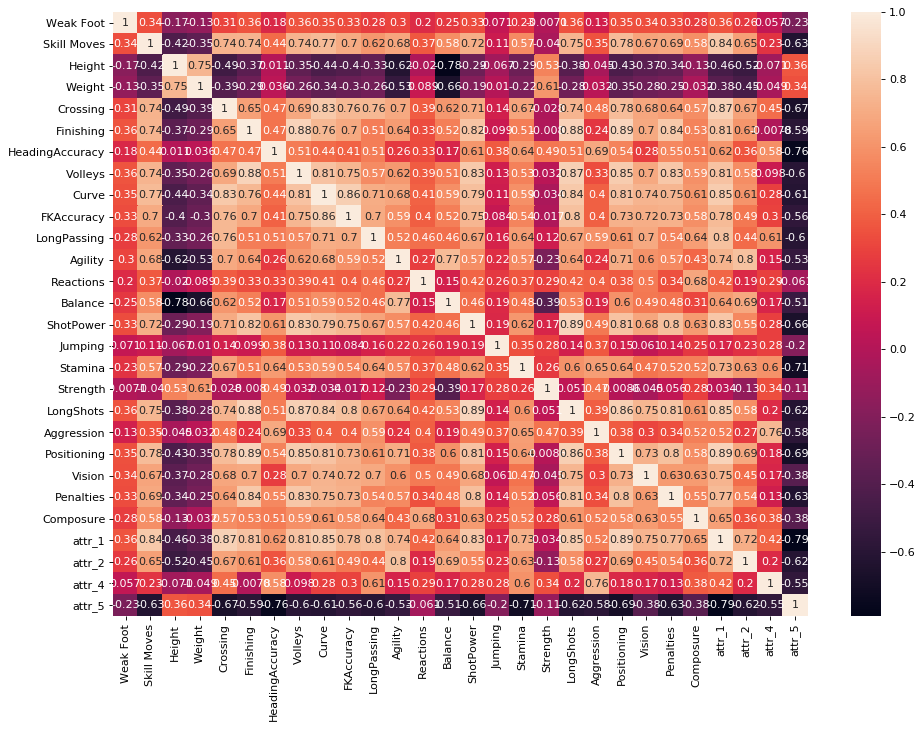

In [25]:
thr = 0.9 #próg współczynnika korelacji, atrybuty skorelowane ponad próg zostaną scalone

dff = df.select_dtypes(['number']).copy()
corr = dff.corr()
continueLoop = True
attr_id = 0;
while(continueLoop):
    continueLoop = False
    for i in range(0,len(corr)):
        attrs = [i]
        for j in range(0,len(corr)):
            if(i != j and corr.iloc[i,j] > thr):
                attrs.append(j)
        if (len(attrs) > 1):
            attr_name = 'attr_' + str(attr_id)
            attr_names = []
            for k in attrs:
                attr_names.append(dff.columns[k])
            print('Combining ' + str(attr_names) + ' into ' + attr_name)
            attr_id = attr_id + 1
            dff[attr_name] = dff.iloc[:,attrs].mean(axis=1)
            dff = dff.drop(dff.columns[attrs], axis=1)
            continueLoop = True
            corr = dff.corr()
            break;     
plt.figure(figsize=(14,10),dpi = 80)
sns.heatmap(dff.corr(),annot = dff.corr())
"Liczba atrybutów po scalaniu: " + str(len(dff.columns))

W wyniku scalania mocno skorelowanych atrybutów (powyżej 0.9), udało nam się zredukować ilość atrybutów z 38 do 28

## Wybór parametrów

Trzeba pamiętać, że nasz model ma klasyfikować piłkarzy do 23 pozycji. My jesteśmy w stanie naocznie zauważyć w danych jedynie zależności pomiędzy dużymi grupami piłkarzy, np.: różnice pomiędzy ofensywnyni i defensywnymi czy bocznymi i środkowymi. Nasz model musi być jednak znacznie dokładniejszy i uwzględniać atrybuty pokazujace różnice pomiędzy specyficznymi pozycjami. Trudno jest dobrać "ręcznie" atrybuty dla tak skomplikowanego klasyfikatora. W związku postanowiliśmy wspomóc się gotowym narzędziem do doboru parametrów - **SelectKBest**.

Narzędzie SelectKBest jest używane w zadaniach klasyfikacji do doboru najlepszych atrybutów. Przy pomocy wybranej funkcji ocenenia atrybuty i wybiera K najlepszych.

Użyliśmy dwóch funkcji oceny: domyślną (ANOVA F) oraz chi2 (test chi-kwadrat) oraz kilka wartości liczby K najlepszych atrybutów uwzględnionych w modelu, aby znaleźć konfigurację dającą najdokładniejszy model.

Najdokładniejszy model otrzymaliśmy odrzucając 2 najgorsze atrybuty według funkcji chi2: Reactions, Height. Oznacza to, że użyliśmy 27 atrybutów. 

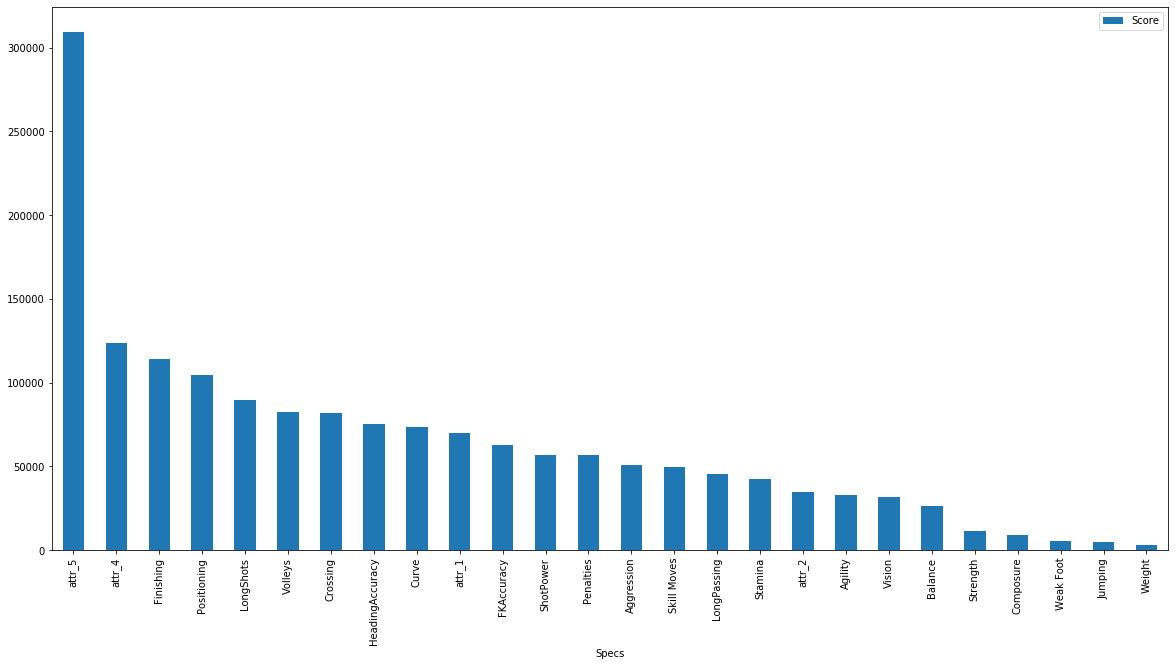

In [187]:
# SelectKBest
y = df['Position'] #target
X = dff #nasz zbiór

n = len(X.columns) - 2 #K - ile najlepszych atrybutów uwzględniamy w modelu

bestfeatures = SelectKBest(score_func=chi2, k=n)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.nlargest(n,'Score').set_index('Specs').plot(kind='bar', figsize=(20,10))

X = X[featureScores.nlargest(n,'Score').iloc[:,0].values].join(isLeft)

Zadaliśmy 4 modele klasyfikacji omawiane na zajęciach wraz ze zbiorem parametrów: 
* K najbliższych sąsiadów
* Naiwny klasyfikator bayesowski
* Metoda najbliższych prototypów
* Drzewo decyzyjne

Narzędzie GridSearchCV sprawdza dokładność danego modelu dla każdego zestawu parametrów, które podamy. Dokładność jest sprawdzana metodą walidacji krzyżowej (cross validation), dzięki czemu nie musimy dzielić danych na zestaw treningowy i walidacyjny. W ten sposób będziemy w stanie dobrać najlepsze parametry dla każdego modelu. Następnie, spośród 4 modeli, wybierzemy ten z największą dokładnością.

In [188]:
#parametry modeli sprawdzane przez GridSearch
dt = {KNeighborsClassifier() : {'n_neighbors': np.arange(57, 63, 2)},
      NearestCentroid() : {'metric': ['euclidean', 'manhattan']},
      GaussianNB() : {},
      DecisionTreeClassifier() : {'max_depth': np.arange(5, 12)}}

#podział danych na treningowe i testowe
#train_x, val_x, train_y, val_y = train_test_split(X, y, random_state = 0, test_size = 0.2) #podział danych

best_estimator = None #zmienna best_estimator zachowa najlepszy model (z 4 wybranych) z najlepszymi parametrami 
tmp = 0

for key in dt:
    m = GridSearchCV(key, dt[key]) #przekazujemy model wraz z listą parametrów do GridSearch
    m.fit(X, y)
    
    if m.best_score_ > tmp:
        best_estimator = m.best_estimator_
        tmp = m.best_score_
    
    print ('Model {}'.format(type(key).__name__))
    print ('Najlepszy wynik : {}'.format(m.best_score_))
    print ('Najlepsze parametry: {}'.format(m.best_params_))
    print('\n\n')

Model KNeighborsClassifier
Najlepszy wynik : 0.4833453581852042
Najlepsze parametry: {'n_neighbors': 59}



Model NearestCentroid
Najlepszy wynik : 0.3453030132548924
Najlepsze parametry: {'metric': 'euclidean'}



Model GaussianNB
Najlepszy wynik : 0.43681521300674114
Najlepsze parametry: {}



Model DecisionTreeClassifier
Najlepszy wynik : 0.48196100763819205
Najlepsze parametry: {'max_depth': 8}





Najlepszą dokładność klasyfikacji otrzymujemy dla klasyfiaktora k najbliższych sąsiadów (k = 59): ~48.3%

Niemal identyczny, jednak minimalnie niższy wynik mamy dla drzewa decyzyjnego (max. głędbokość 8): ~48.2%.

Naiwny klasyfikator bayesowski jest już wyraźnie mniej dokładny: ~43.7%.

Metoda najbliższego prototypu daje wyraźnie najgorszy wynik spośród badanych modeli: ~34.5%

## Weryfikacja najlepszego modelu

Tworzymy model z najlepszym wynikiem i parametrami wskazanymi przed GridSearchCV - **klasyfiaktor k najbliższych sąsiadów (k = 59)**. Tym razem jednak trenujemy go na danych testowych, ponieważ chcemy przeanalizować dokładność jego klasyfikacji na nowych danych (walidacyjnych).

Ponieważ mamy dużo pozycji, zamiast macierzy pomyłek, tworzymy wykresy kolumnowe, które pokażą do jakiej pozycji model przypisał piłkarzy względem ich prawdziwej pozycji.

Wykres kolumnowy - do jakiej pozycji model przypisał piłkarzy względem ich prawdziwej pozycji:


C:\Users\krzys\anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # This is added back by InteractiveShellApp.init_path()


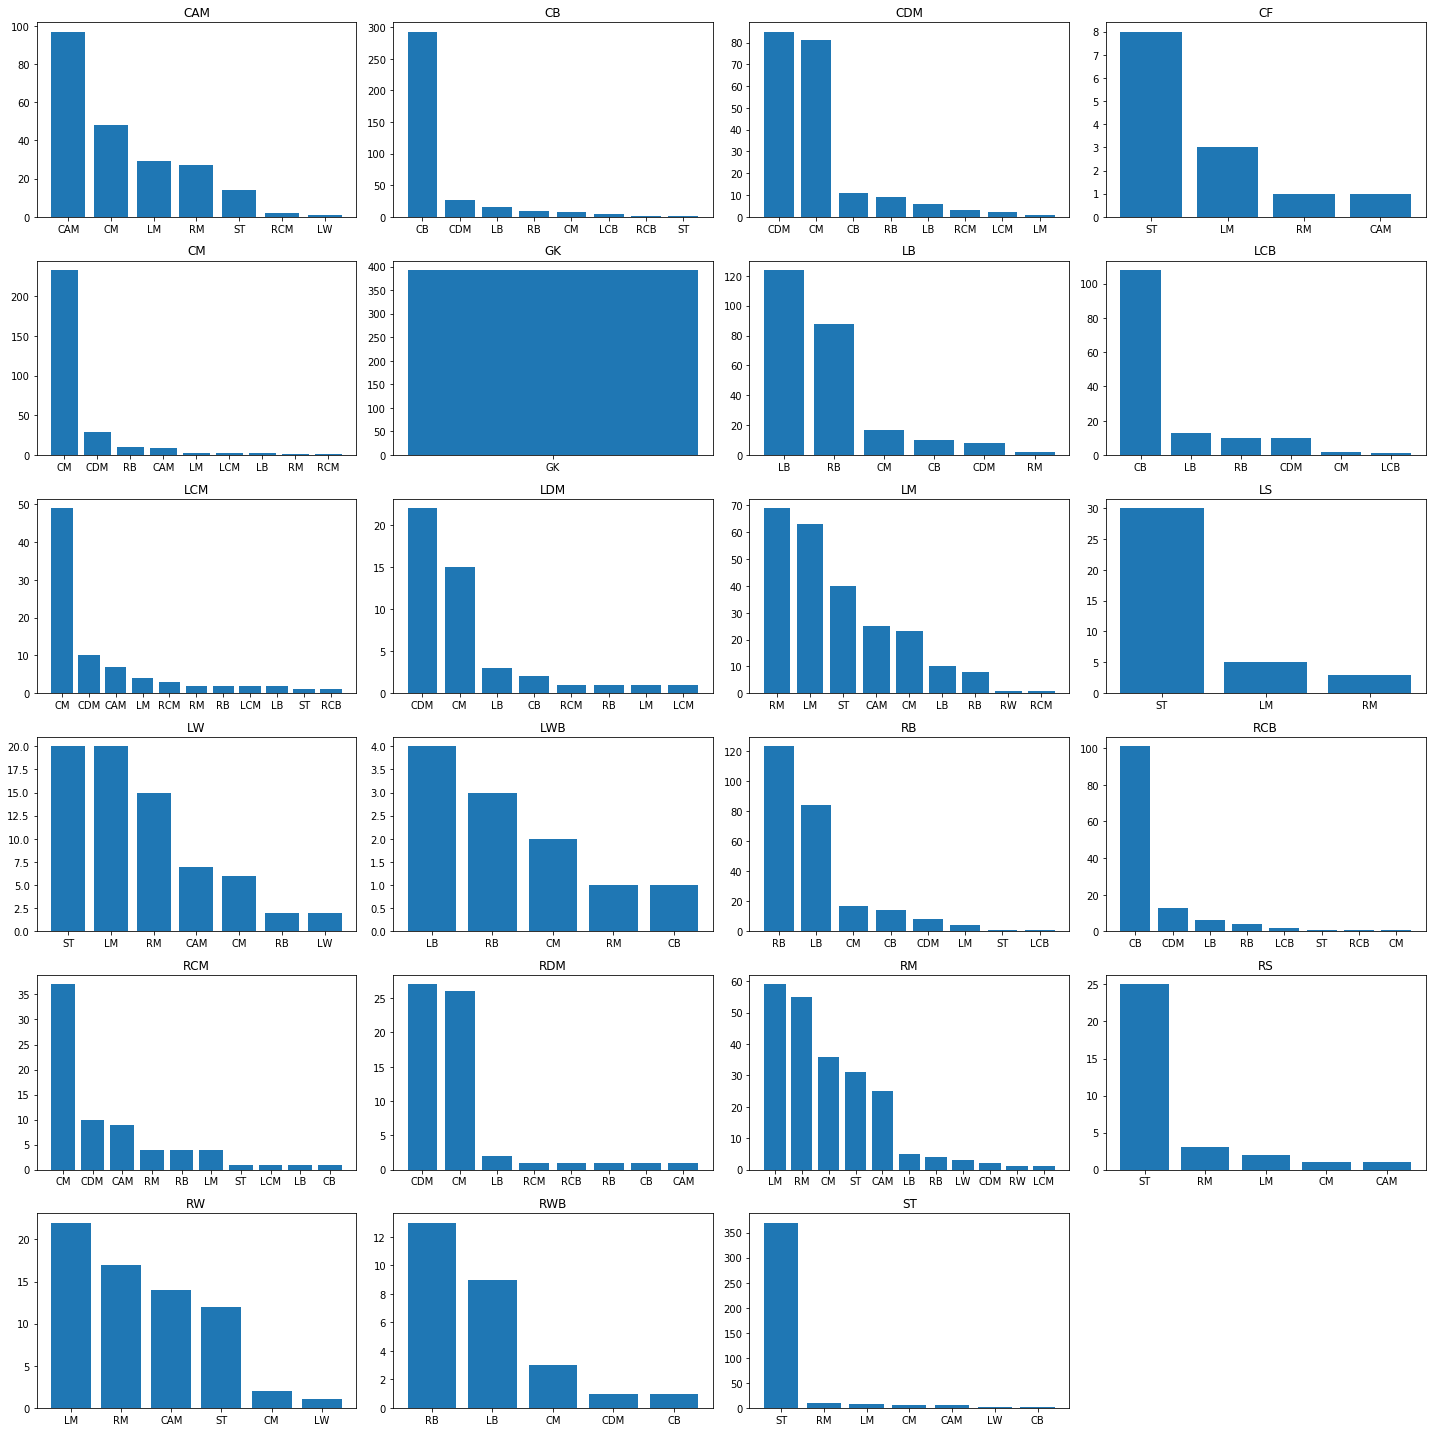

Procent poprawnego dopasowania piłkarzy na konkretnej pozycji:
GK     1.000000
ST     0.925000
CB     0.816156
CM     0.806228
LB     0.497992
RB     0.488095
CAM    0.444954
CDM    0.429293
LM     0.262500
RM     0.247748
LW     0.027778
LCM    0.024096
RCB    0.007752
LCB    0.006944
RCM    0.000000
LWB    0.000000
RWB    0.000000
LDM    0.000000
RDM    0.000000
RS     0.000000
CF     0.000000
RW     0.000000
LS     0.000000
dtype: float64


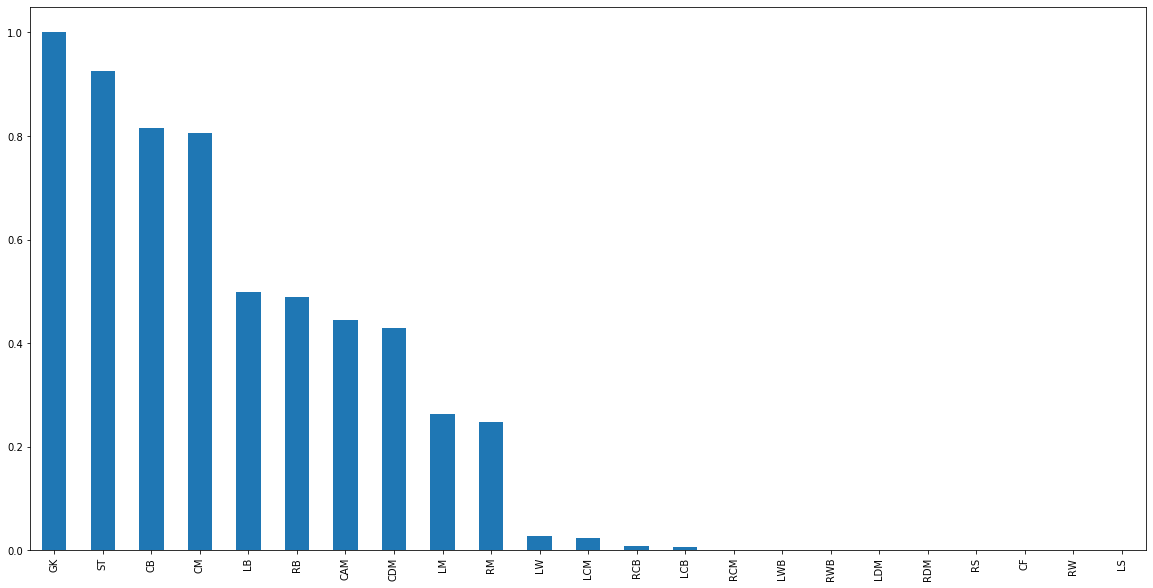

In [189]:
model = best_estimator
model.fit(train_x, train_y)
wynik_test = model.predict(val_x)

print("Wykres kolumnowy - do jakiej pozycji model przypisał piłkarzy względem ich prawdziwej pozycji:")
mp_test = pd.crosstab(val_y, wynik_test)

f = plt.figure(figsize=(20, 20))

ax = []
rate_df = pd.Series({})

j = 0
    
for i in range(0, len(mp_test.index)):
    r = mp_test.iloc[i]
    r = r[r != 0].sort_values(ascending=False)
    cname = mp_test.index[i]
    
    f.tight_layout()
    
    ax.append(f.add_subplot(6, 4,i+1))
    ax[i].title.set_text(cname)
    ax[i].bar(r.index, r, width = 0.8)
    
    if cname in mp_test.columns:
        rate_df[cname] = mp_test.iloc[i][j] / mp_test.iloc[i].sum()
        j += 1
    else:
        rate_df[cname] = 0
    
plt.show()

print("Procent poprawnego dopasowania piłkarzy na konkretnej pozycji:")
print(rate_df.sort_values(ascending=False))
        
rate_df.sort_values(ascending=False).plot(kind = 'bar', figsize=(20,10))

Najlepsza, bezbłędna skuteczność jest dla **GK** (bramkarza). Nie jest to jednak zaskoczeniem, ponieważ cechy bramkarskie wyraźnie odróżniały go od innych. 

Dobrą skuteczność (powyżej 80%) mamy także dla pozycji **ST, CB, CM**. Oznacza to, że dla 4 najliczniejszych pozycji (i najbardziej podstawowych) nasz model radzi dobie bardzo dobrze.

Niższą skuteczność (40-50%) mamy dla pozycji **LB, RB, CAM, CDM**. Pozycje RB i LB często są mylone ze sobą przez model. CDM jest bardzo często mylony z CM i rzadziej z obrońcami. CAM jest czesto brany jako CM, LM lub RM.

Skuteczność na poziomie ~20% mamy dla pozycji **LM, RM**. Pozycje te są często mylone ze sobą, ale także z ST i CM.

Niemal zerową skuteczność mamy dla pozycji **LW, LCM, RCB, LCB**.

Dla aż 9 spośród 23 pozycji mamy zerową dokładność przypasowania. Są to: **RCM, LWB, RWB, LDM, RDM, RS, CF, RW, LS**. W naszych danych brakuje atrybutów, które są w stanie wyraźnie oddzielić te pozycje od reszty.

## O niskiej dokładności modelu
Generalnie, dokładność poniżej 50% w klasyfikacji wydaje się być mało zadowalająca. Jest to jednak przede wszystkim wina nie źle dopasowanego modelu, a danych. W naszych danych bowiem zwyczajnie brakuje atrybutów, które byłyby w stanie wyraźnie rozróżnić większość pozycji. Dla najabrdziej charakterystycznych: GK, ST, CB, CM nasz model radzi sobie bardzo dobrze. Jednakże te bardziej specyficzne, jak: LCM, LS, RCB, są zbyt mało charakterystyczne, by nasz model mógł je rozróżnić. 

Aby udowodnić tę tezę, sprawdźmy skuteczność modelu przy dopasowywaniu piłkarzy do 4 grup (napastnicy, pomocnicy, obrońcy, bramkarze). Użyjemy tych samych danych testowych i predykcji modelu.

In [190]:
#Podział na GK, DEF, MID i FWD
results = pd.DataFrame({})
results['real'] = val_y
results['pred'] = wynik_test
results['pred'] = results['pred'].map(lambda x: 'GK' if x in gk else ('DF' if x in defe else ('MF' if x in mid else 'FW')))
results['real'] = results['real'].map(lambda x: 'GK' if x in gk else ('DF' if x in defe else ('MF' if x in mid else 'FW')))
a = (len(results[results['pred'] == results['real']]) / len(results)) * 100
print('Skuteczność modelu wynosi', a, '%')

Skuteczność modelu wynosi 87.24757952973721 %


Jak widać, skuteczność naszego modelu przy podziale piłkarzy tylko na 4 podstawowe pozycje jest bardzo wysoka - ponad 87%. Biorąc pod uwagę, że nie optymalizowaliśmy naszego modelu dla takiej klasyfikacji, prawdopodbnie dałoby się uzyskać jeszcze wyższą dokłądność. |

# Podsumowanie

Najskuteczniejszym modelem w naszym zadaniu okazał się być klasyfikator K najbliższych sąsiadów (k = 59).

In [192]:
cross_val_score(estimator=best_estimator, X=X, y=y, cv=5).mean()

0.4833453581852042

Skuteczność uzyskanej klasyfikacji dla wszystkich pozycji jest równa ~48.3% (używając walidacji krzyżowej na całym zbiorze). Biorąc pod uwagę liczbę pozycji, do których nasz model miał przypisywać piłkarzy (23), nie jest to wynik zły. Świadczy on jedynie o tym, że w naszych danych nie było cech pozwalających na tak dokładny podział.

Zasadniczo w piłce nożnej mamy 4 pozycje: bramkarz, obrońca, pomocnik i napastnik. I patrząc pod tym kątem, piłkarze na poszczególnych pozycjach wyraźnie róźnią się od siebie. Napastnik ma lepsze wykończenie, pomocnik lepsze podania, obrońca wślizgi, zaś bramkarz ma zupełnie inny zestaw. Fifa rozróżnia jednak wiele więcej pozycji, bardzo specyficznych. Są one często związane bardziej z formacjami, niż z konkretnymi cechami piłkarza. Jeżeli mamy aż 23 różne pozycje (oryginalnie w danych było 27!) logicznym jest, że większość z nich będzie bardzo podobna. Podsumowując, możemy rozróżniać pozycje piłkarzy po ich cechach fizycznych i umiejetnościach, ale ma to sens tylko do pewnego stopnia dokładności - 23 pozycje to trochę za dużo.